# Total Variation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

## implementation of total variation model

In [2]:
from total_variation_3d import TotalVariation3D

### try the implemented total variation model

load a video

In [3]:
cap = cv2.VideoCapture('rabbit.mov')

video = list()
while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break
    video.append(cv2.resize(cv2.cvtColor(frame[400:1000, 150:-150], cv2.COLOR_BGR2GRAY), None, fx=0.25, fy=0.25))
cap.release()

video = np.array(video, dtype='float32') / 255.
coef = np.array([1, -1])
lambd = .5

In [4]:
print(video.shape, np.prod(video.shape))

(161, 150, 112) 2704800


In [5]:
%%time
tv = TotalVariation3D(lambd = lambd, saturation = True, extended_output = True, max_iter = 100, coef = coef)
smoothed, obj = tv.transform(video)

100%|██████████| 100/100 [00:25<00:00,  4.02it/s]

CPU times: user 30.3 s, sys: 7.01 s, total: 37.3 s
Wall time: 25.9 s


objective function

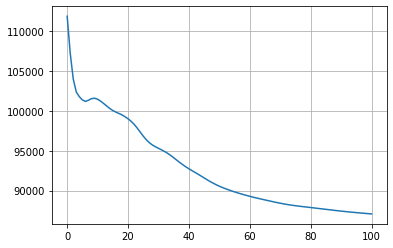

In [6]:
plt.plot(obj[:])
plt.grid(True)

result

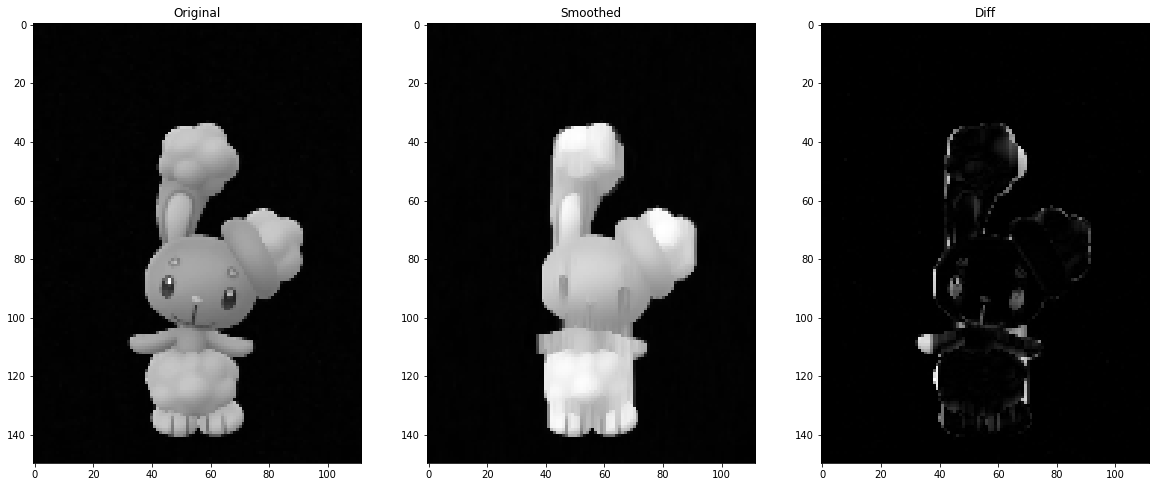

In [7]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.imshow(video[1], cmap='gray')
plt.grid(False)
plt.title('Original')
plt.subplot(1,3,2)
plt.imshow(smoothed[1], cmap='gray')
plt.grid(False)
plt.title('Smoothed')
plt.subplot(1,3,3)
plt.imshow(np.abs(video[1] - smoothed[1]), cmap='gray')
plt.grid(False)
plt.title('Diff')
plt.show()

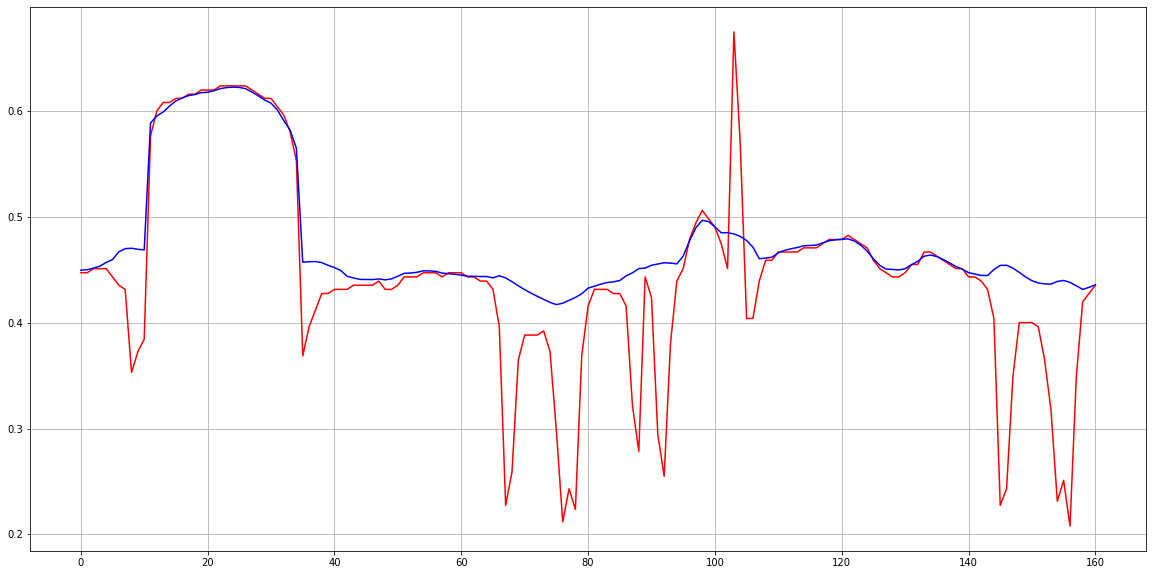

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(video[:, 100, 60], 'r')
plt.plot(smoothed[:, 100, 60], 'b')
plt.grid()

In [9]:
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('smoothed_rabbit.mp4',fourcc, 20.0, (224, 150), isColor=False)

for frame1, frame2 in zip(video, smoothed):
    frame = np.hstack([frame1 * 255, np.clip(frame2 * 255, 0, 255)])
    out.write(np.uint8(frame))
out.release()